# **Predicting Traffic Incident Severity Based on Weather and Time Factors**


## 1.0 **Description**

The goal of this project is to develop a predictive model that can estimate the severity of traffic incidents based on various factors such as weather conditions (rain, snow, fog, etc.) and time-related elements (time of day, day of the week, and holidays). The model will utilize historical traffic incident data from San Fransisco open data source, weather patterns, and temporal factors to predict the likelihood of incidents leading to severe outcomes, such as injuries or fatalities, rather than minor disruptions. This will help transportation authorities, emergency services, and city planners make data-driven decisions, optimize response strategies, and improve public safety.

## 1.1 Business Understanding

aiming to reduce the devastating consequences of road traffic accidents,this project employs machine learning to predict accident severity. The model, trained on data including vehicle type,casualty details,the type of the road, the location, the weather at the time of the accident just to mention a few, that can be used to inform proactive strategies aimed at reducing fatalities and injuries.

Traffic incidents contribute significantly to congestion, injuries, fatalities, and economic losses. Understanding the factors that influence the severity of these incidents can help reduce the overall impact on society. By leveraging data science to predict the severity of traffic incidents based on weather and time related variables, transportation agencies can:

- ```Improve Safety```: Predicting severe incidents allows for timely interventions, such as dispatching emergency services more effectively.


- ```Optimize Resource Allocation```: Traffic management and emergency responders can allocate resources in advance based on predicted severity, ensuring quicker response times in critical situations.

- ```Enhance Traffic Management```: Better understanding of incident severity can guide traffic signal optimization, road closures, and detour planning to minimize disruptions.

- ```Promote Public Awareness```: Through predictive insights, authorities can inform drivers about weather-related risks and encourage safer driving practices during high-risk periods.

This project aims to create a solution that not only reduces the severity of traffic incidents but also improves overall traffic flow and safety.

## 1.2 Objectives

1. Data collection:  The data was sourced from https://data.sfgov.org/Public-Safety/Traffic-Crashes-Resulting-in-Injury/ubvf-ztfx/about_data

2. Data cleaning

3. Exploratory Data analysis

4. Feature Engineering

5. Model development

6. Model evaluation

7. Model deployment

## 1.3 Shareholders

- ```Transportation Authorities```: Local and regional traffic management departments who would benefit from predictive tools to optimize response times and reduce traffic disruptions.

- ```Emergency Services```: Police, fire departments, and medical teams who could use severity predictions to prepare resources and prioritize high-risk incidents.
- ```City Planners and Government Agencies```: Municipal decision makers focused on infrastructure planning and public safety initiatives could use these insights to improve roadways and safety measures.

- ```Public and Drivers```: The general public will benefit indirectly through increased safety, fewer severe accidents, and enhanced traffic management.

- ```Insurance Companies```: Insurers could use severity predictions to optimize their pricing models, assess risk in real-time, and process claims more efficiently.
- ```Weather Services```: Weather data providers may collaborate for deeper insights and provide better real-time forecasts for integrating into the system.

- ```Technology Providers```: Companies providing machine learning infrastructure, cloud services, and data collection tools will play a role in the development and deployment of the model.

## **2.0 Data Loading and Data Understanding**

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.impute import SimpleImputer

# Suppress all warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# Loading the data and printing out the head
data = pd.read_csv('Traffic_Crashes_Resulting_in_Injury_20250305.csv')
data.head()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,collision_time,accident_year,month,day_of_week,time_cat,juris,officer_id,reporting_district,beat_number,primary_rd,secondary_rd,distance,direction,weather_1,weather_2,collision_severity,type_of_collision,mviw,ped_action,road_surface,road_cond_1,road_cond_2,lighting,control_device,intersection,vz_pcf_code,vz_pcf_group,vz_pcf_description,vz_pcf_link,number_killed,number_injured,street_view,dph_col_grp,dph_col_grp_description,party_at_fault,party1_type,party1_dir_of_travel,party1_move_pre_acc,party2_type,party2_dir_of_travel,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at,analysis_neighborhood,supervisor_district,police_district,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,82049,20208000.0,8087000.0,230041955,37.734019,-122.388046,SFPD-INTERIM DB,CITY STREET,01/18/2023 05:53:00 PM,2023 January 18,17:53:00,2023,January,Wednesday,2:01 pm to 6:00 pm,3801,1260,Bayview,3C13D,LANE ST,NEWCOMB AVE,68.0,South,Clear,Not Stated,Injury (Complaint of Pain),Overturned,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Dark - Street Lights,None,Midblock > 20ft,NaN,NaN,Unknown,NaN,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,AA,Vehicle(s) Only Involved,NaN,Driver,West,Proceeding Straight,NaN,NaN,NaN,POINT (-122.388046197 37.734018596),01/14/2025 12:00:00 AM,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Bayview Hunters Point,10.0,BAYVIEW,2.0,9.0,1.0,86.0,86.0
1,82166,25723000.0,805000.0,230111655,37.762886,-122.428578,SFPD-INTERIM DB,CITY STREET,02/15/2023 09:30:00 AM,2023 February 15,09:30:00,2023,February,Wednesday,6:01 am to 10:00 am,3801,1514,Mission,NaN,17TH ST,CHURCH ST,20.0,West,Clear,Not Stated,Injury (Complaint of Pain),Other,Bicycle,No Pedestrian Involved,Dry,Other,Not Stated,Daylight,None,Intersection <= 20ft,NaN,NaN,Unknown,NaN,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,FF,Bicycle Only,NaN,Bicyclist,East,Proceeding Straight,NaN,NaN,NaN,POINT (-122.428577738 37.762885599),01/14/2025 12:00:00 AM,01/21/2025 12:00:00 AM,02/10/2025 01:42:44 PM,Castro/Upper Market,8.0,MISSION,3.0,5.0,5.0,37.0,37.0
2,41951,32862000.0,7826101.0,3491922,37.768636,-122.454858,SFPD-CROSSROADS,CITY STREET,11/11/2007 03:50:00 PM,2007 November 11,15:50:00,2007,November,Sunday,2:01 pm to 6:00 pm,3801,246,PARK,4B6G,KEZAR DR,WALLER ST,210.0,North,Clear,Not Stated,Injury (Other Visible),Hit Object,Fixed Object,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,None,Midblock > 20ft,Unknown,Unknown,Unknown,Not Stated,0.0,2,https://maps.google.com/maps?q=&layer=c&cbll=3...,AA,Vehicle(s) Only Involved,NaN,Driver,North,Proceeding Straight,NaN,NaN,NaN,POINT (-122.454858378 37.768635577),11/11/2007 12:00:00 AM,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,Golden Gate Park,5.0,PARK,7.0,11.0,12.0,9.0,9.0
3,48546,23904000.0,NaN,190523857,37.780363,-122.399080,SFPD-INTERIM DB,CITY STREET,07/19/2019 01:50:00 PM,2019 July 19,13:50:00,2019,July,Friday,10:01 am to 2:00 pm,3801,1931,Southern,3B46,PERRY ST,04TH ST,0.0,Not Stated,Clear,Not Stated,Injury (Complaint of Pain),Broadside,Bicycle,No Pedestrian Involved,Dry,No Unusual Condition,Not Stated,Daylight,Functioning,Intersection <= 20ft,Unknown,Unknown,Unknown,NaN,0.0,1,https://maps.google.com/maps?q=&layer=c&cbll=3...,CC,Vehicle-Bicycle,NaN,Bicyclist,East,Making Left Turn,Driver,East,Making Left Turn,POINT (-122.399079635 37.780362888),07/31/2019 12:00:00 AM,04/26/2023 12:00:00 AM,02/10/2025 01:42:44 PM,South of Market,6.0,SOUTHERN,1.0,10.0,34.0,32.0,32.0
4,35692,26705000.0,NaN,170390767,37.804146,-122.425110,SFPD-CROSSROADS,CITY STREET,05/11/2017 07:53:00 AM,2017 May 11,07:53:00,2017,May,Thursday,6:01 am to 10:00 am,3801,1330,3E,NaN,BAY ST,VAN NESS AVE,0.0,Not Stated,Not Stated,Not Stated,Injury (Complaint of Pain),Not Stated,Not Stated,N

In [3]:
data["party1_type"].value_counts()

Driver            50086
Bicyclist          4973
Pedestrian         4816
Other               948
Parked Vehicle      367
Not Stated           27
Bicycle               1
Name: party1_type, dtype: int64

In [4]:
# understanding the shape of the data
shape = data.shape
print(shape)
print(f'the traffic data set has',shape[0] ,'rows and',shape[1],'columns')

(61229, 63)
the traffic data set has 61229 rows and 63 columns


In [5]:
# inspecting the columns
columns = data.columns
print(columns)

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

In [6]:
# checking info
info = data.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61229 entries, 0 to 61228
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unique_id                     61229 non-null  int64  
 1   cnn_intrsctn_fkey             61207 non-null  float64
 2   cnn_sgmt_fkey                 27336 non-null  float64
 3   case_id_pkey                  61229 non-null  object 
 4   tb_latitude                   61062 non-null  float64
 5   tb_longitude                  61062 non-null  float64
 6   geocode_source                61229 non-null  object 
 7   geocode_location              61229 non-null  object 
 8   collision_datetime            61229 non-null  object 
 9   collision_date                61229 non-null  object 
 10  collision_time                61169 non-null  object 
 11  accident_year                 61229 non-null  int64  
 12  month                         61229 non-null  object 
 13  d

### 2.1 Dataset Description

#### Overview
This dataset contains information about traffic accidents, with a total of 61,229 entries. It includes various attributes related to the accident details, such as location, time, collision type, and injury data. The dataset is valuable for analysis related to traffic safety, accident severity, and patterns across different areas and conditions.

#### Features
The dataset consists of the following columns:

- **unique_id**: Unique identifier for each accident (int64).
- **cnn_intrsctn_fkey**: Foreign key linking to intersection data (float64).
- **cnn_sgmt_fkey**: Foreign key linking to segment data (float64).
- **case_id_pkey**: Primary key for case ID (object).
- **tb_latitude**: Latitude of the accident (float64).
- **tb_longitude**: Longitude of the accident (float64).
- **geocode_source**: Source of geocoding data (object).
- **geocode_location**: Geocoded location information (object).
- **collision_datetime**: Date and time of the collision (object).
- **collision_date**: Date of the collision (object).
- **collision_time**: Time of the collision (object).
- **accident_year**: Year of the accident (int64).
- **month**: Month of the accident (object).
- **day_of_week**: Day of the week when the accident occurred (object).
- **time_cat**: Time category of the accident (object).
- **juris**: Jurisdiction (object).
- **officer_id**: ID of the officer reporting the accident (object).
- **reporting_district**: District from which the report originated (object).
- **beat_number**: Beat number assigned to the report (object).
- **primary_rd**: Primary road involved in the accident (object).
- **secondary_rd**: Secondary road involved in the accident (object).
- **distance**: Distance from the reference point (float64).
- **direction**: Direction of travel (object).
- **weather_1**: Primary weather condition at the time of the accident (object).
- **weather_2**: Secondary weather condition (object).
- **collision_severity**: Severity of the collision (object).
- **type_of_collision**: Type of collision (object).
- **mviw**: Motor vehicle involvement (object).
- **ped_action**: Pedestrian action (object).
- **road_surface**: Condition of the road surface (object).
- **road_cond_1**: Primary road condition (object).
- **road_cond_2**: Secondary road condition (object).
- **lighting**: Lighting condition at the time of the accident (object).
- **control_device**: Type of traffic control device at the intersection (object).
- **intersection**: Whether the accident occurred at an intersection (object).
- **vz_pcf_code**: Code for the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_group**: Grouping of the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_description**: Description of the Vehicle-Zone Potential Conflict (object).
- **vz_pcf_link**: Link to more information about the potential conflict (object).
- **number_killed**: Number of people killed in the accident (float64).
- **number_injured**: Number of people injured in the accident (int64).
- **street_view**: Street view image URL of the accident location (object).
- **dph_col_grp**: Department of Public Health collision group (object).
- **dph_col_grp_description**: Description of the Department of Public Health collision group (object).
- **party_at_fault**: Party at fault for the accident (float64).
- **party1_type**: Type of the first party involved in the accident (object).
- **party1_dir_of_travel**: Direction of travel for the first party (object).
- **party1_move_pre_acc**: Movement of the first party before the accident (object).
- **party2_type**: Type of the second party involved in the accident (object).
- **party2_dir_of_travel**: Direction of travel for the second party (object).
- **party2_move_pre_acc**: Movement of the second party before the accident (object).
- **point**: Geospatial point data for the accident (object).
- **data_as_of**: Date the data was last updated (object).
- **data_updated_at**: Timestamp when the data was last updated (object).
- **data_loaded_at**: Timestamp when the data was loaded (object).
- **analysis_neighborhood**: Neighborhood where the accident occurred (object).
- **supervisor_district**: Supervisor district where the accident occurred (float64).
- **police_district**: Police district where the accident occurred (object).
- **Current Police Districts**: Police districts for the current data (float64).
- **Current Supervisor Districts**: Supervisor districts for the current data (float64).
- **Analysis Neighborhoods**: Neighborhoods relevant for analysis (float64).
- **Neighborhoods**: Neighborhoods associated with the accident (float64).
- **SF Find Neighborhoods**: Neighborhoods found by the SF Find algorithm (float64).

- **Missing values**: Some columns contain missing values. For example, `cnn_sgmt_fkey`, `party_at_fault`, and `party2_type` have missing data for some records.
  
#### Data Source
This dataset is sourced from San Fransisco Open data source

#### Usage
This dataset will be used for various analyses related to traffic accidents, including:
- Accident severity analysis
- Geospatial analysis of accident hotspots
- Study of weather, road conditions, and lighting effects on accidents
- Machine learning for predicting accident severity based on features like weather, location, and vehicle type



In [7]:
summury = data.describe().T
print(summury)

                                count          mean           std  \
unique_id                     61229.0  3.551137e+04  2.455893e+04   
cnn_intrsctn_fkey             61207.0  2.585379e+07  4.916555e+06   
cnn_sgmt_fkey                 27336.0  6.975567e+06  4.068037e+06   
tb_latitude                   61062.0  3.776579e+01  2.444219e-02   
tb_longitude                  61062.0 -1.224287e+02  2.834483e-02   
accident_year                 61229.0  2.014422e+03  5.705362e+00   
distance                      61150.0  5.596129e+01  2.638240e+02   
number_killed                 61226.0  9.799758e-03  1.016098e-01   
number_injured                61229.0  1.252903e+00  6.998025e-01   
party_at_fault                55163.0  1.013270e+00  1.247372e-01   
supervisor_district           60988.0  6.074342e+00  2.913055e+00   
Current Police Districts      60994.0  5.139833e+00  2.980160e+00   
Current Supervisor Districts  61015.0  6.688732e+00  3.365241e+00   
Analysis Neighborhoods        6099

In [8]:
# droping the unnecessary columns
data = data[[ 'collision_time','month','day_of_week','distance','weather_1','collision_severity','type_of_collision','road_surface','lighting','control_device','number_killed','number_injured', 'party1_dir_of_travel','party1_move_pre_acc','party2_dir_of_travel','party2_move_pre_acc']]
data.head()

,collision_time,month,day_of_week,distance,weather_1,collision_severity,type_of_collision,road_surface,lighting,control_device,number_killed,number_injured,party1_dir_of_travel,party1_move_pre_acc,party2_dir_of_travel,party2_move_pre_acc
0,17:53:00,January,Wednesday,68.0,Clear,Injury (Complaint of Pain),Overturned,Dry,Dark - Street Lights,None,0.0,1,West,Proceeding Straight,NaN,NaN
1,09:30:00,February,Wednesday,20.0,Clear,Injury (Complaint of Pain),Other,Dry,Daylight,None,0.0,1,East,Proceeding Straight,NaN,NaN
2,15:50:00,November,Sunday,210.0,Clear,Injury (Other Visible),Hit Object,Dry,Daylight,None,0.0,2,North,Proceeding Straight,NaN,NaN
3,13:50:00,July,Friday,0.0,Clear,Injury (Complaint of Pain),Broadside,Dry,Daylight,Functioning,0.0,1,East,Making Left Turn,East,Making Left Turn
4,07:53:00,May,Thursday,0.0,Not Stated,Injury (Complaint of Pain),Not Stated,Not Stated,Not Stated,Not Stated,0.0,1,North,Not Stated,West,Not Stated


In [9]:
df = data.copy(deep = True)

In [10]:
df.shape

(61229, 16)

In [11]:
# checking for null values
null = df.isna().sum()
print(null)

collision_time            60
month                      0
day_of_week                9
distance                  79
weather_1                  0
collision_severity         0
type_of_collision          0
road_surface               0
lighting                   0
control_device             0
number_killed              3
number_injured             0
party1_dir_of_travel      11
party1_move_pre_acc       10
party2_dir_of_travel    4384
party2_move_pre_acc     4383
dtype: int64


In [12]:
print(df.dtypes)

collision_time           object
month                    object
day_of_week              object
distance                float64
weather_1                object
collision_severity       object
type_of_collision        object
road_surface             object
lighting                 object
control_device           object
number_killed           float64
number_injured            int64
party1_dir_of_travel     object
party1_move_pre_acc      object
party2_dir_of_travel     object
party2_move_pre_acc      object
dtype: object


In [13]:
df["number_injured"]=df["number_injured"].astype(float)
print(df.dtypes)

collision_time           object
month                    object
day_of_week              object
distance                float64
weather_1                object
collision_severity       object
type_of_collision        object
road_surface             object
lighting                 object
control_device           object
number_killed           float64
number_injured          float64
party1_dir_of_travel     object
party1_move_pre_acc      object
party2_dir_of_travel     object
party2_move_pre_acc      object
dtype: object


In [14]:
df.head()

,collision_time,month,day_of_week,distance,weather_1,collision_severity,type_of_collision,road_surface,lighting,control_device,number_killed,number_injured,party1_dir_of_travel,party1_move_pre_acc,party2_dir_of_travel,party2_move_pre_acc
0,17:53:00,January,Wednesday,68.0,Clear,Injury (Complaint of Pain),Overturned,Dry,Dark - Street Lights,None,0.0,1.0,West,Proceeding Straight,NaN,NaN
1,09:30:00,February,Wednesday,20.0,Clear,Injury (Complaint of Pain),Other,Dry,Daylight,None,0.0,1.0,East,Proceeding Straight,NaN,NaN
2,15:50:00,November,Sunday,210.0,Clear,Injury (Other Visible),Hit Object,Dry,Daylight,None,0.0,2.0,North,Proceeding Straight,NaN,NaN
3,13:50:00,July,Friday,0.0,Clear,Injury (Complaint of Pain),Broadside,Dry,Daylight,Functioning,0.0,1.0,East,Making Left Turn,East,Making Left Turn
4,07:53:00,May,Thursday,0.0,Not Stated,Injury (Complaint of Pain),Not Stated,Not Stated,Not Stated,Not Stated,0.0,1.0,North,Not Stated,West,Not Stated


In [57]:
df.shape

(7861, 16)

## 2.2 Data Cleaning



In [15]:
# Convert all column names to lowercase
df.columns =df.columns.str.lower()

In [16]:
df["distance"].mode()

0    0.0
dtype: float64

In [17]:
df["distance"].skew()

53.48496119388204

<AxesSubplot:ylabel='distance'>

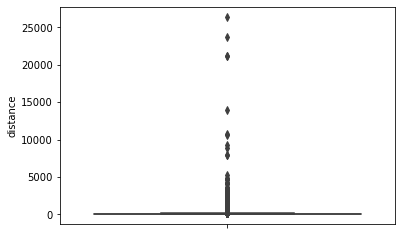

In [18]:
sns.boxplot(data=df, y='distance')

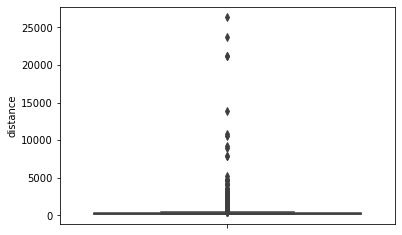

In [19]:
# checking for outliers
outliers_multiple_columns = pd.DataFrame()


exclude_columns = ['number_injured', 'number_killed']

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    
    if col not in exclude_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        df = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        

# Calculate the sum of outliers for each column (excluding 'number_injured' and 'number_killed')
sns.boxplot(y='distance', data=df);

In [20]:
# caping outliers
for col in outliers_multiple_columns.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers to the upper and lower bounds
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

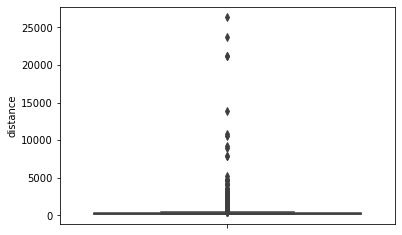

In [21]:
sns.boxplot(y='distance', data=df);

In [22]:
numeric_cols = ['distance', 'number_killed']
imputer = SimpleImputer(strategy='median')  # use median
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Impute categorical columns with 'Unknown' 
categorical_cols = ['party2_dir_of_travel', 'party2_move_pre_acc']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# For small missing data, impute with mode
df['day_of_week'] = df['day_of_week'].fillna(df['day_of_week'].mode()[0])

# Drop rows with small missing data
df = df.dropna(subset=[ 'collision_time', 'party1_dir_of_travel','party1_move_pre_acc'])

In [23]:
df.isna().sum()

collision_time          0
month                   0
day_of_week             0
distance                0
weather_1               0
collision_severity      0
type_of_collision       0
road_surface            0
lighting                0
control_device          0
number_killed           0
number_injured          0
party1_dir_of_travel    0
party1_move_pre_acc     0
party2_dir_of_travel    0
party2_move_pre_acc     0
dtype: int64

In [24]:
# Converting collision_date and collision_time to datetime
df['collision_time'] = pd.to_datetime(df['collision_time'])

In [25]:
# Converting columns with repeated values to categorical type
categorical_columns = [ 'month', 'day_of_week',
     'weather_1', 'collision_severity', 
    'type_of_collision', 'road_surface', 'lighting', 'control_device', 'party1_dir_of_travel',
    'party1_move_pre_acc', 'party2_dir_of_travel', 'party2_move_pre_acc'
]
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.astype('category'))


In [26]:
#checking value counts for the target column
df['collision_severity'].value_counts()

Injury (Complaint of Pain)    4621
Injury (Other Visible)        2480
Injury (Severe)                659
Fatal                          101
Name: collision_severity, dtype: int64

In [27]:
#Drop rows where 'collision_severity' is 'Medical'
df = df[df['collision_severity'] != 'Medical']

In [28]:
# converting the entries in the collision_severity column into simplified labels like Pain, Visible, Severe,and Fatal.
severity_mapping = {
    'Injury (Complaint of Pain)': 'Pain',
    'Injury (Other Visible)': 'Visible',
    'Injury (Severe)': 'Severe',
    'Fatal': 'Fatal',
}

# Apply the mapping to the 'collision_severity' column
df['collision_severity'] = df['collision_severity'].replace(severity_mapping)

print(df['collision_severity'].value_counts())

Pain       4621
Visible    2480
Severe      659
Fatal       101
Name: collision_severity, dtype: int64


In [29]:
df['weather_1'].value_counts()

Clear         6468
Cloudy         841
Raining        412
Not Stated      57
Fog             49
Other           27
Wind             6
Snowing          1
Name: weather_1, dtype: int64

In [30]:
# Replace less informative or rare values with a more general category
df['weather_1'] = df['weather_1'].replace({
    'Other: Unknown': 'Other',
    'Other: NOT ON SCENE': 'Other',
    'Other: NOT AT SCENE': 'Other',
    'Other: MISTING': 'Other',
    'Fog / Visibility: 800 ft': 'Fog',
    'Fog / Visibility: 10 ft': 'Fog',
    'Fog / Visibility': 'Fog',
    'Snowing': 'Snow',  # Grouping different snow-related entries
    'Wind': 'Windy',  # Grouping wind-related values
})

# o drop values with very low frequency (e.g., 1 or 2 occurrences)
# Count the frequency of each value in the column
value_counts = df['weather_1'].value_counts()

# Filter out values that appear only once or twice and replace them with 'Other'
df['weather_1'] = df['weather_1'].apply(lambda x: x if value_counts[x] > 2 else 'Other')

# Check the cleaned column
print(df['weather_1'].value_counts())

Clear         6468
Cloudy         841
Raining        412
Not Stated      57
Fog             49
Other           28
Windy            6
Name: weather_1, dtype: int64


In [31]:
df['lighting'].value_counts()

Daylight                                5259
Dark - Street Lights                    2168
Dusk - Dawn                              237
Dark - No Street Lights                  121
Not Stated                                58
Dark - Street Lights Not Functioning      18
Name: lighting, dtype: int64

In [32]:
df['lighting'] = df['lighting'].replace({
    'Dark - Street Lights Not Functioning': 'Dark',  
    'Dark - No Street Lights': 'Dark',  
    'Not Stated': 'Unknown',  
})

# Check the cleaned column
print(df['lighting'].value_counts())

Daylight                5259
Dark - Street Lights    2168
Dusk - Dawn              237
Dark                     139
Unknown                   58
Name: lighting, dtype: int64


## 3.0 **Exploratory Data Analysis**

#### 3.1 Univariate Analysis

In [33]:
day_severity_count=df.groupby(['day_of_week','collision_severity']).size().reset_index(name='count')
pvt_table=pd.pivot_table(day_severity_count,values='count',index=['day_of_week'],columns=['collision_severity'],aggfunc='sum')
pvt_table

collision_severity,Fatal,Pain,Severe,Visible
day_of_week,,,,
Friday,19,722,87,408
Monday,13,642,91,324
Saturday,14,571,100,391
Sunday,19,515,83,299
Thursday,13,716,93,331
Tuesday,11,725,106,363
Wednesday,12,730,99,364


In [34]:
collision_severity_counts = df["collision_severity"].value_counts().sort_index()
collision_severity_counts

Fatal       101
Pain       4621
Severe      659
Visible    2480
Name: collision_severity, dtype: int64

Is there a relationship between collission severity and the day the accident occours

In [35]:
homogeneity_table = pd.crosstab(df["collision_severity"], df["day_of_week"])
homogeneity_table

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
collision_severity,,,,,,,
Fatal,19,13,14,19,13,11,12
Pain,722,642,571,515,716,725,730
Severe,87,91,100,83,93,106,99
Visible,408,324,391,299,331,363,364


In [36]:
import scipy.stats as stats

##### null hypothesis:There is no statistically significant differenece in collision severity and the day it occours
##### Alternative hypothesis:There is a sitatistically significant difference between injury severity and the day it occours

In [37]:
chi2, p, dof, ex = stats.chi2_contingency(homogeneity_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 36.55187669052782
p-value: 0.005991430606207416


p-value < 0.05 we fail to reject the null hypothesis, implying that there no relationship between collission severity and the day the accident occours

- The higher numbers of accidents on Friday and Saturday, particularly for "Pain" and "Visible" categories, might be related to increased social activity, weekend travel, or other factors associated with the end of the work week and the weekend.

- The higher number of fatal collisions on these days is also worth noting and investigating.

- The lower numbers on Sunday could be attributed to reduced traffic volume, different driving patterns, or other factors.

- Across all days, "Pain" and "Visible" collisions are much more frequent than "Severe" and "Fatal" collisions, which aligns with the general understanding that minor accidents are more common.

In [38]:
month_severity_count=df.groupby(['month','collision_severity']).size().reset_index(name='count')
pvt_table_m=pd.pivot_table(month_severity_count,values='count',index=['month'],columns=['collision_severity'],aggfunc='sum')
pvt_table_m

collision_severity,Fatal,Pain,Severe,Visible
month,,,,
April,3,378,57,234
August,15,404,53,215
December,10,413,57,187
February,9,335,42,171
January,5,388,56,187
July,5,357,52,203
June,9,350,55,221
March,10,398,59,201
May,7,405,58,205


In [39]:
independence_table1 = pd.crosstab(df["collision_severity"], df["month"])
independence_table1

month,April,August,December,February,January,July,June,March,May,November,October,September
collision_severity,,,,,,,,,,,,
Fatal,3,15,10,9,5,5,9,10,7,8,9,11
Pain,378,404,413,335,388,357,350,398,405,353,416,424
Severe,57,53,57,42,56,52,55,59,58,44,65,61
Visible,234,215,187,171,187,203,221,201,205,204,227,225


In [40]:
chi2, p, dof, ex = stats.chi2_contingency(independence_table1)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 29.076017084847873
p-value: 0.6629713586335022


- The high number of accidents in October could be due to various factors, such as:
Changes in weather conditions (e.g., increased rainfall, fog in some regions)
Increased traffic volume due to specific events or activities
Reduced daylight hours in some areas

- June and July's Lower Accident Rate: The lower numbers in June and July might be attributed to factors such as:
  - School holidays, which could lead to changes in commuting patterns
  - More daylight hours
  - Potentially drier weather conditions in some areas

- Similar to the day-of-week data, "Pain" and "Visible" collisions are much more frequent than "Severe" and "Fatal" collisions across all months, reinforcing the general trend that less severe accidents are more common.

In [41]:
weather_severity_count=df.groupby(['weather_1','collision_severity']).size().reset_index(name='count')
pvt_table_w=pd.pivot_table(weather_severity_count,values='count',index=['weather_1'],columns=['collision_severity'],aggfunc='sum')
pvt_table_w


collision_severity,Fatal,Pain,Severe,Visible
weather_1,,,,
Clear,81.0,3783.0,553.0,2051.0
Cloudy,9.0,494.0,62.0,276.0
Fog,1.0,22.0,9.0,17.0
Not Stated,1.0,39.0,2.0,15.0
Other,2.0,17.0,3.0,6.0
Raining,7.0,264.0,28.0,113.0
Windy,NaN,2.0,2.0,2.0


In [42]:
independence_table2 = pd.crosstab(df["collision_severity"], df["weather_1"])
independence_table2

weather_1,Clear,Cloudy,Fog,Not Stated,Other,Raining,Windy
collision_severity,,,,,,,
Fatal,81,9,1,1,2,7,0
Pain,3783,494,22,39,17,264,2
Severe,553,62,9,2,3,28,2
Visible,2051,276,17,15,6,113,2


In [43]:
chi2, p, dof, ex = stats.chi2_contingency(independence_table2)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 32.84503449376465
p-value: 0.01742554463211559


In [44]:
independence_table3 = pd.crosstab(df["collision_severity"], df["collision_time"])
independence_table3

collision_time,2025-03-18 00:01:00,2025-03-18 00:02:00,2025-03-18 00:03:00,2025-03-18 00:04:00,2025-03-18 00:05:00,2025-03-18 00:06:00,2025-03-18 00:07:00,2025-03-18 00:08:00,2025-03-18 00:10:00,2025-03-18 00:11:00,2025-03-18 00:12:00,2025-03-18 00:13:00,2025-03-18 00:15:00,2025-03-18 00:16:00,2025-03-18 00:17:00,2025-03-18 00:18:00,2025-03-18 00:19:00,2025-03-18 00:20:00,2025-03-18 00:22:00,2025-03-18 00:23:00,2025-03-18 00:24:00,2025-03-18 00:25:00,2025-03-18 00:26:00,2025-03-18 00:27:00,2025-03-18 00:28:00,2025-03-18 00:29:00,2025-03-18 00:30:00,2025-03-18 00:31:00,2025-03-18 00:33:00,2025-03-18 00:34:00,2025-03-18 00:35:00,2025-03-18 00:36:00,2025-03-18 00:38:00,2025-03-18 00:39:00,2025-03-18 00:40:00,2025-03-18 00:41:00,2025-03-18 00:42:00,2025-03-18 00:43:00,2025-03-18 00:44:00,2025-03-18 00:45:00,2025-03-18 00:46:00,2025-03-18 00:47:00,2025-03-18 00:48:00,2025-03-18 00:49:00,2025-03-18 00:50:00,2025-03-18 00:51:00,2025-03-18 00:52:00,2025-03-18 00:54:00,2025-03-18 00:55:00,2025-03-18 00:57:00,2025-03-18 00:58:00,2025-03-18 00:59:00,2025-03-18 01:00:00,2025-03-18 01:01:00,2025-03-18 01:03:00,2025-03-18 01:04:00,2025-03-18 01:05:00,2025-03-18 01:06:00,2025-03-18 01:07:00,2025-03-18 01:08:00,2025-03-18 01:09:00,2025-03-18 01:10:00,2025-03-18 01:11:00,2025-03-18 01:12:00,2025-03-18 01:13:00,2025-03-18 01:14:00,2025-03-18 01:15:00,2025-03-18 01:16:00,2025-03-18 01:18:00,2025-03-18 01:19:00,2025-03-18 01:20:00,2025-03-18 01:21:00,2025-03-18 01:22:00,2025-03-18 01:23:00,2025-03-18 01:24:00,2025-03-18 01:25:00,2025-03-18 01:27:00,2025-03-18 01:28:00,2025-03-18 01:29:00,2025-03-18 01:30:00,2025-03-18 01:31:00,2025-03-18 01:32:00,2025-03-18 01:35:00,2025-03-18 01:36:00,2025-03-18 01:37:00,2025-03-18 01:38:00,2025-03-18 01:39:00,2025-03-18 01:40:00,2025-03-18 01:41:00,2025-03-18 01:42:00,2025-03-18 01:43:00,2025-03-18 01:44:00,2025-03-18 01:45:00,2025-03-18 01:46:00,2025-03-18 01:48:00,2025-03-18 01:49:00,2025-03-18 01:50:00,2025-03-18 01:51:00,2025-03-18 01:53:00,2025-03-18 01:54:00,2025-03-18 01:55:00,2025-03-18 01:56:00,2025-03-18 01:57:00,2025-03-18 01:58:00,2025-03-18 01:59:00,2025-03-18 02:00:00,2025-03-18 02:01:00,2025-03-18 02:02:00,2025-03-18 02:03:00,2025-03-18 02:04:00,2025-03-18 02:05:00,2025-03-18 02:06:00,2025-03-18 02:07:00,2025-03-18 02:08:00,2025-03-18 02:09:00,2025-03-18 02:10:00,2025-03-18 02:11:00,2025-03-18 02:12:00,2025-03-18 02:13:00,2025-03-18 02:14:00,2025-03-18 02:15:00,2025-03-18 02:16:00,2025-03-18 02:17:00,2025-03-18 02:18:00,2025-03-18 02:19:00,2025-03-18 02:20:00,2025-03-18 02:21:00,2025-03-18 02:22:00,2025-03-18 02:24:00,2025-03-18 02:25:00,2025-03-18 02:26:00,2025-03-18 02:27:00,2025-03-18 02:28:00,2025-03-18 02:29:00,2025-03-18 02:30:00,2025-03-18 02:31:00,2025-03-18 02:32:00,2025-03-18 02:33:00,2025-03-18 02:34:00,2025-03-18 02:35:00,2025-03-18 02:36:00,2025-03-18 02:38:00,2025-03-18 02:39:00,2025-03-18 02:40:00,2025-03-18 02:41:00,2025-03-18 02:42:00,2025-03-18 02:43:00,2025-03-18 02:44:00,2025-03-18 02:45:00,2025-03-18 02:46:00,2025-03-18 02:47:00,2025-03-18 02:48:00,2025-03-18 02:50:00,2025-03-18 02:51:00,2025-03-18 02:52:00,2025-03-18 02:53:00,2025-03-18 02:54:00,2025-03-18 02:55:00,2025-03-18 02:56:00,2025-03-18 02:57:00,2025-03-18 02:58:00,2025-03-18 02:59:00,2025-03-18 03:00:00,2025-03-18 03:01:00,2025-03-18 03:03:00,2025-03-18 03:04:00,2025-03-18 03:05:00,2025-03-18 03:06:00,2025-03-18 03:07:00,2025-03-18 03:08:00,2025-03-18 03:09:00,2025-03-18 03:10:00,2025-03-18 03:11:00,2025-03-18 03:12:00,2025-03-18 03:13:00,2025-03-18 03:15:00,2025-03-18 03:16:00,2025-03-18 03:19:00,2025-03-18 03:20:00,2025-03-18 03:22:00,2025-03-18 03:23:00,2025-03-18 03:24:00,2025-03-18 03:25:00,2025-03-18 03:26:00,2025-03-18 03:27:00,2025-03-18 03:28:00,2025-03-18 03:29:00,2025-03-18 03:30:00,2025-03-18 03:31:00,2025-03-18 03:32:00,2025-03-18 03:33:00,2025-03-18 03:34:00,2025-03-18 03:35:00,2025-03-18 03:36:00,2025-03-18 03:37:00,2025-03-18 03:42:00,2025-03-18 03:43:00,2025-03-18 03:44:00,2025-03-18 03:45:00,2025-

In [45]:
chi2, p, dof, ex = stats.chi2_contingency(independence_table3)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 4780.534280544046
p-value: 3.979027626040897e-17


In [46]:
independence_table4 = pd.crosstab(df["collision_severity"], df["party1_dir_of_travel"])
independence_table4

party1_dir_of_travel,East,North,Not Stated,South,West
collision_severity,,,,,
Fatal,20,32,6,21,22
Pain,1109,1257,145,1140,970
Severe,151,160,24,166,158
Visible,635,607,79,602,557


In [47]:
chi2, p, dof, ex = stats.chi2_contingency(independence_table4)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 16.802443024391017
p-value: 0.15718107861434116


In [48]:
independence_table5 = pd.crosstab(df["collision_severity"], df["party2_dir_of_travel"])
independence_table5

party2_dir_of_travel,East,North,Not Stated,South,Unknown,West
collision_severity,,,,,,
Fatal,16,11,10,23,22,19
Pain,919,1051,309,964,477,901
Severe,123,107,62,117,147,103
Visible,478,467,191,442,466,436


In [49]:
chi2, p, dof, ex = stats.chi2_contingency(independence_table5)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 170.2541528819687
p-value: 2.173396971104858e-28


In [50]:
independence_table6 = pd.crosstab(df["collision_severity"], df["road_surface"])
independence_table6

road_surface,Dry,Not Stated,Slippery,Snowy or Icy,Wet
collision_severity,,,,,
Fatal,90,0,1,0,10
Pain,4057,74,9,4,477
Severe,598,7,2,0,52
Visible,2213,35,8,2,222


In [51]:
chi2, p, dof, ex = stats.chi2_contingency(independence_table6)

print("Chi-square statistic:", chi2)
print("p-value:", p)

Chi-square statistic: 13.081245595453591
p-value: 0.363163176999213


- The high number of accidents in clear weather emphasizes that weather is not the only, or even primary, cause of many accidents. Driver behavior, traffic density, and other factors are crucial.

- The "Not Stated" category highlights the need for better data collection practices to ensure accurate and complete information.

- While clear weather dominates, the data shows that adverse weather conditions like "Cloudy," "Raining," and "Fog" do correlate with accidents, as expected.

- The low number of accidents in windy conditions might suggest that extreme wind is less frequently a direct cause of accidents.

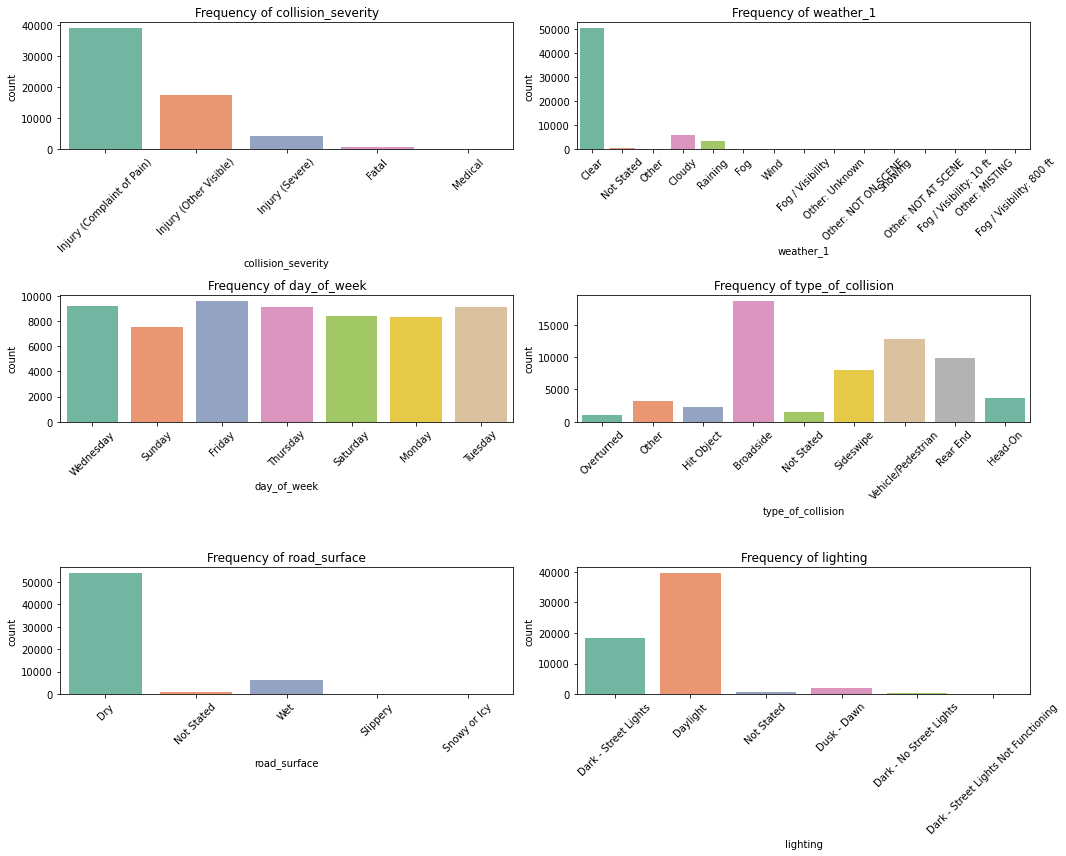

In [52]:
# Bar plot for categorical columns

categorical_columns = ['collision_severity', 'weather_1', 'day_of_week', 'type_of_collision', 'road_surface', 'lighting']

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


`Key Takeaways:`

- Clear Weather and Dry Roads: Collisions most often occur in clear weather and on dry roads, suggesting that weather and road conditions are not the only factors contributing to accidents.

- Daylight Hours: Collisions are more frequent during daylight hours, which likely correlates with higher traffic volume.

- Data Completeness: The "Not Stated" categories in some charts highlight potential data gaps and the need for more complete information in future studies.

- Collision Types: Broadside and rear-end collisions are common types of accidents.

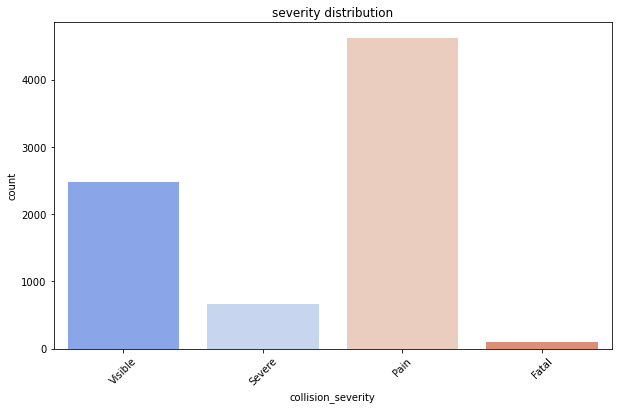

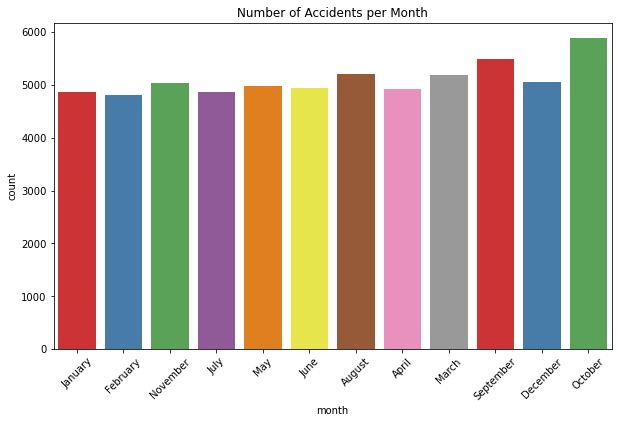

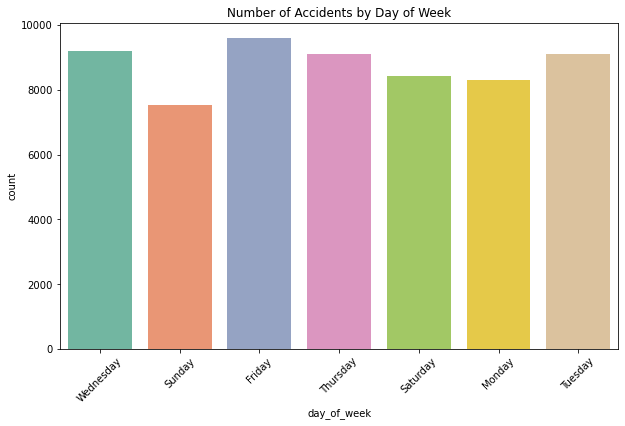

In [53]:
# Distribution of accidents over the year
plt.figure(figsize=(10, 6))
sns.countplot(x=df['collision_severity'], palette='coolwarm')
plt.title('severity distribution')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x=data['month'], palette='Set1')
plt.title('Number of Accidents per Month')
plt.xticks(rotation=45)
plt.show()

# Distribution of accidents by day of week
plt.figure(figsize=(10, 6))
sns.countplot(x=data['day_of_week'], palette='Set2')
plt.title('Number of Accidents by Day of Week')
plt.xticks(rotation=45)
plt.show()


<AxesSubplot:xlabel='distance', ylabel='collision_severity'>

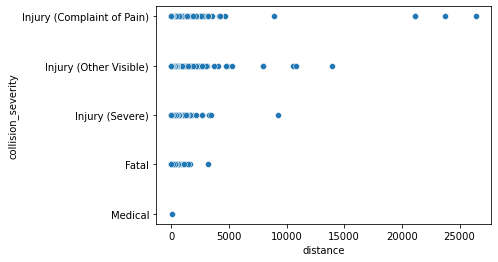

In [54]:
sns.scatterplot(x=data['distance'], y=data['collision_severity'])

<AxesSubplot:xlabel='collision_severity', ylabel='number_killed'>

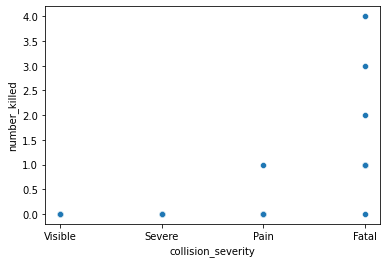

In [55]:
sns.scatterplot(x=df['collision_severity'], y=df['number_killed'])

<AxesSubplot:xlabel='collision_severity', ylabel='number_injured'>

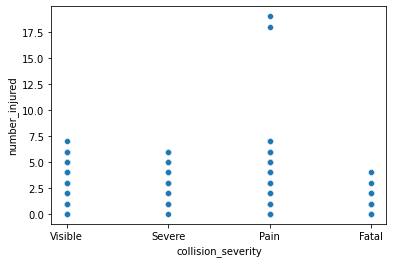

In [56]:
sns.scatterplot(x=df['collision_severity'], y=df['number_injured'])

- There appears to be a noticeable increase in accidents in the later years (around 2017-2019).

- There's a visible drop in accidents in the most recent years (2020-2023). This could potentially be related to external factors or changes in data collection.

- Friday shows the highest number of accidents, suggesting it's the most accident-prone day of the week.

- Sunday has the lowest number of accidents, indicating it's the safest day (in terms of accident frequency).

- Thursday, Tuesday, and Wednesday also have relatively high accident counts, comparable to Friday.

- Monday and Saturday fall somewhere in the middle, with a moderate number of accidents.

- October shows the highest number of accidents, indicating it's the most accident-prone month.

- June and July have relatively lower accident counts compared to other months.
Relatively High Counts: August, September, April, and November also show relatively high accident counts.

- The remaining months (December, February, January, March, May) have moderate accident counts.